Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Cleaned large dataset saved as 'cleaned_large_dataset.csv'


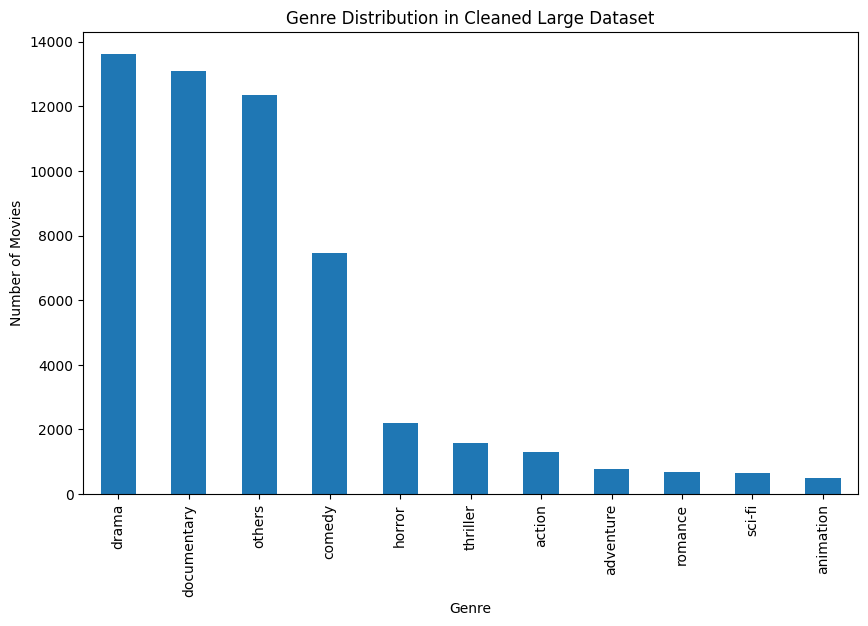

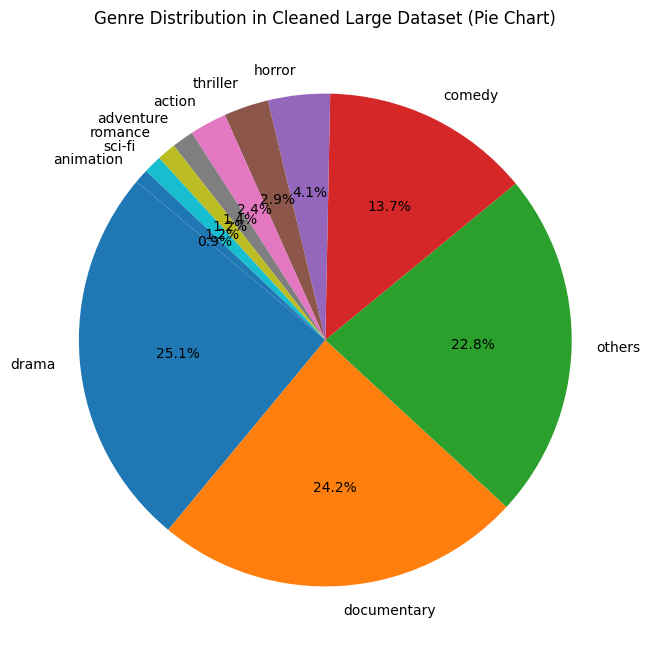

In [ ]:
import pandas as pd
import os
from google.colab import drive
import matplotlib.pyplot as plt

# Mount Google Drive
drive.mount('/content/drive')

# Load large dataset
large_file = os.path.join("/content/drive/MyDrive/Dataset", "train_data.csv")
large_df = pd.read_csv(large_file)

# Step 1: Lowercase all column names
large_df.columns = large_df.columns.str.lower()

# Step 2: Lowercase the genre values too
large_df['genre'] = large_df['genre'].str.lower()

# Step 3: Fix common genre naming issues
def normalize_genre(genre):
    if pd.isna(genre):
        return genre
    genre = genre.strip().lower()
    if genre in ['science fiction', 'sci fi', 'sci-fi']:
        return 'sci-fi'
    if genre in ['documentary']:
        return 'documentary'
    if genre in ['animation']:
        return 'animation'
    if genre in ['thriller']:
        return 'thriller'
    if genre in ['horror']:
        return 'horror'
    if genre in ['romance']:
        return 'romance'
    if genre in ['adventure']:
        return 'adventure'
    if genre in ['drama']:
        return 'drama'
    if genre in ['action']:
        return 'action'
    if genre in ['comedy']:
        return 'comedy'
    return genre  # otherwise leave it as it is

large_df['genre'] = large_df['genre'].apply(normalize_genre)

# Step 4: Define the final genres to keep (lowercased properly)
genres_to_keep = [
    'drama', 'comedy', 'action', 'thriller', 'sci-fi',
    'documentary', 'horror', 'romance', 'animation', 'adventure'
]

# Step 5: Map genres not in the keep list to 'others'
large_df['genre'] = large_df['genre'].apply(lambda x: x if x in genres_to_keep else 'others')

# Step 6: Drop rows where title or genre is missing
large_df = large_df.dropna(subset=['title', 'genre'])

# Save cleaned large dataset
large_df.to_csv('/content/drive/MyDrive/cleaned_large_dataset.csv', index=False)

print("✅ Cleaned large dataset saved as 'cleaned_large_dataset.csv'")
large_df.head()

# Step 5: Plot genre distribution
def plot_genre_distribution(large_df, title):
    genre_counts = large_df['genre'].value_counts()
    plt.figure(figsize=(10,6))
    genre_counts.plot(kind='bar')
    plt.title(title)
    plt.xlabel('Genre')
    plt.ylabel('Number of Movies')
    plt.show()

    plt.figure(figsize=(8,8))
    genre_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
    plt.title(title + ' (Pie Chart)')
    plt.ylabel('')
    plt.show()

# Step 6: Call the plotting function
plot_genre_distribution(large_df, 'Genre Distribution in Cleaned Large Dataset')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Cleaned small dataset saved as 'cleaned_small_dataset.csv'


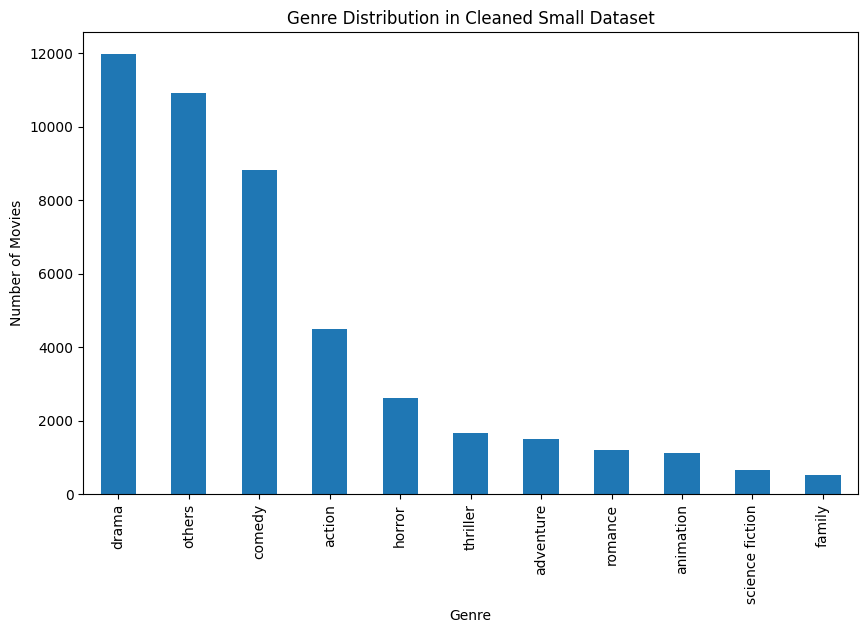

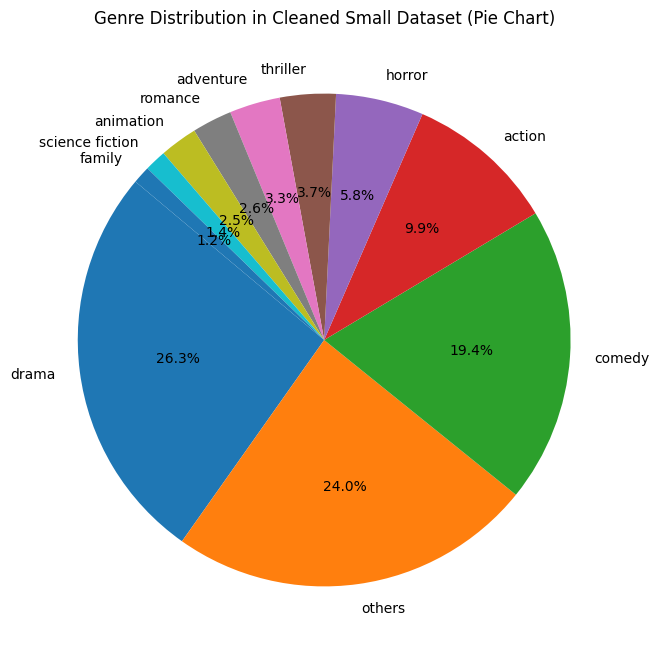

In [ ]:
import pandas as pd
import ast
import os
import matplotlib.pyplot as plt
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load small dataset
small_file = os.path.join("/content/drive/MyDrive/Dataset", "movies_metadata.csv")
small_df = pd.read_csv(small_file, low_memory=False)

# Step 1: Select important columns only
important_columns = ['title', 'overview', 'poster_path', 'genres']
small_df = small_df[important_columns]

# Step 2: Lowercase all column names
small_df.columns = small_df.columns.str.lower()

# Step 3: Rename 'genres' column to 'genre'
small_df.rename(columns={'genres': 'genre'}, inplace=True)

# Step 4: Parse 'genre' field (now: keep only first genre name as a string)
def parse_first_genre(genre_str):
    try:
        genres = ast.literal_eval(genre_str)
        if isinstance(genres, list) and len(genres) > 0:
            return genres[0]['name'].lower()  # Only the first genre
        else:
            return None
    except (ValueError, SyntaxError):
        return None

small_df['genre'] = small_df['genre'].apply(parse_first_genre)

# Step 5: Define final genres to keep
top_10_genres = [
    'drama', 'comedy', 'action', 'thriller', 'adventure',
    'horror', 'romance', 'family', 'animation', 'science fiction'
]

# Step 6: Map genres outside the list to 'others'
small_df['genre'] = small_df['genre'].apply(lambda x: x if x in top_10_genres else 'others')

# Step 7: Drop rows with missing title or genre
small_df = small_df.dropna(subset=['title', 'genre'])

# Save cleaned small dataset
small_df.to_csv('/content/drive/MyDrive/Dataset/cleaned_small_dataset.csv', index=False)

print("✅ Cleaned small dataset saved as 'cleaned_small_dataset.csv'")
small_df.head()

# Step 8: Plot genre distribution
def plot_genre_distribution(df, title):
    genre_counts = df['genre'].value_counts()
    plt.figure(figsize=(10,6))
    genre_counts.plot(kind='bar')
    plt.title(title)
    plt.xlabel('Genre')
    plt.ylabel('Number of Movies')
    plt.show()

    plt.figure(figsize=(8,8))
    genre_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
    plt.title(title + ' (Pie Chart)')
    plt.ylabel('')
    plt.show()

# Step 9: Call the plotting function
plot_genre_distribution(small_df, 'Genre Distribution in Cleaned Small Dataset')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Cleaned small dataset saved as 'cleaned_small_dataset.csv'


,imdbid,imdb link,title,imdb score,genre,poster
0,114709,http://www.imdb.com/title/tt114709,Toy Story (1995),8.3,Animation,https://images-na.ssl-images-amazon.com/images...
1,113497,http://www.imdb.com/title/tt113497,Jumanji (1995),6.9,Action,https://images-na.ssl-images-amazon.com/images...
2,113228,http://www.imdb.com/title/tt113228,Grumpier Old Men (1995),6.6,Comedy,https://images-na.ssl-images-amazon.com/images...
3,114885,http://www.imdb.com/title/tt114885,Waiting to Exhale (1995),5.7,Comedy,https://images-na.ssl-images-amazon.com/images...
4,113041,http://www.imdb.com/title/tt113041,Father of the Bride Part II (1995),5.9,Comedy,https://images-na.ssl-images-amazon.com/images...


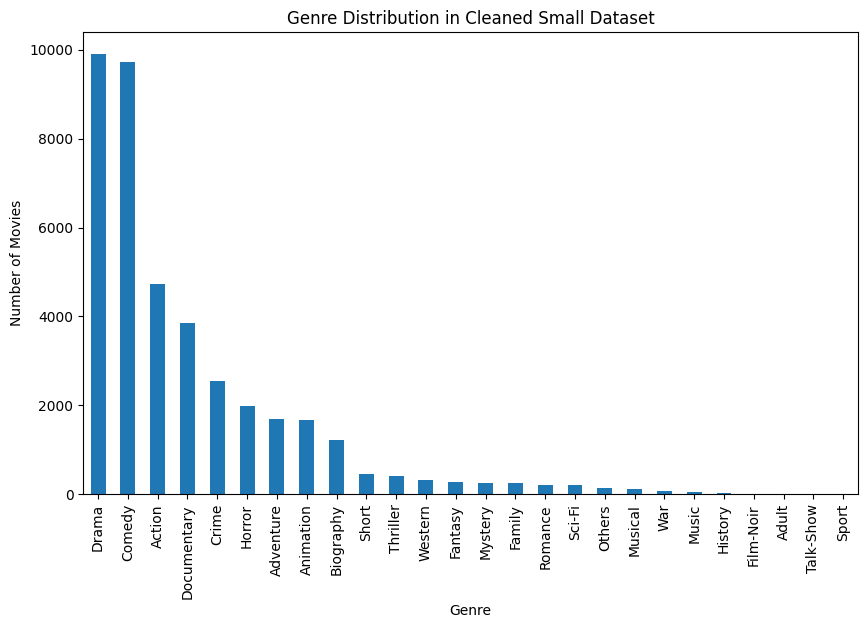

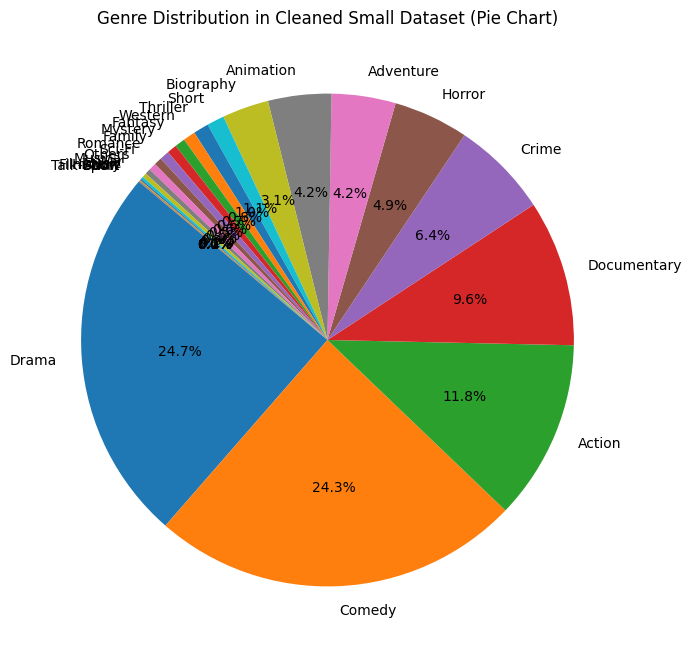

In [ ]:
import pandas as pd
import ast
import os
import matplotlib.pyplot as plt
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load dataset
small_file = os.path.join("/content/drive/MyDrive", "Dataset_3.csv")
small_df = pd.read_csv(small_file, engine='python', encoding='latin1', on_bad_lines='skip')


# Step 1: Lowercase all column names
small_df.columns = small_df.columns.str.lower()

# Step 2: Rename 'genres' column to 'genre'
small_df.rename(columns={'genres': 'genre'}, inplace=True)

# Step 3: Parse and pick the FIRST available genre
def pick_first_genre(genre_str):
    if pd.isna(genre_str) or genre_str.strip() == '':
        return 'Others'
    # Split on '|' and pick the first genre
    genres = genre_str.split('|')
    if len(genres) > 0:
        return genres[0].strip()
    else:
        return 'Others'


# Apply parsing function
small_df['genre'] = small_df['genre'].apply(pick_first_genre)

# Step 4: Drop rows with missing title or genre
small_df = small_df.dropna(subset=['title', 'genre'])

# Step 5: Save cleaned dataset
small_df.to_csv('/content/drive/MyDrive/cleaned_small_dataset.csv', index=False)

print("✅ Cleaned small dataset saved as 'cleaned_small_dataset.csv'")
display(small_df.head())

# Step 6: Plot genre distribution
def plot_genre_distribution(df, title):
    genre_counts = df['genre'].value_counts()
    plt.figure(figsize=(10,6))
    genre_counts.plot(kind='bar')
    plt.title(title)
    plt.xlabel('Genre')
    plt.ylabel('Number of Movies')
    plt.show()

    plt.figure(figsize=(8,8))
    genre_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
    plt.title(title + ' (Pie Chart)')
    plt.ylabel('')
    plt.show()

# Step 7: Call the plotting function
plot_genre_distribution(small_df, 'Genre Distribution in Cleaned Small Dataset')


In [ ]:
import pandas as pd
import ast
import os
import matplotlib.pyplot as plt
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load dataset
small_file = os.path.join("/content/drive/MyDrive", "Dataset_3.csv")
small_df2 = pd.read_csv(small_file, engine='python', encoding='latin1', on_bad_lines='skip')


# Step 1: Lowercase all column names
small_df2.columns = small_df.columns.str.lower()

# Step 2: Rename 'genres' column to 'genre'
small_df2.rename(columns={'genres': 'genre'}, inplace=True)

print(small_df2['genre'].head(20))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
0     Animation|Adventure|Comedy
1        Action|Adventure|Family
2                 Comedy|Romance
3           Comedy|Drama|Romance
4          Comedy|Family|Romance
5             Action|Crime|Drama
6                   Comedy|Drama
7         Adventure|Comedy|Drama
8          Action|Crime|Thriller
9      Action|Adventure|Thriller
10          Comedy|Drama|Romance
11         Comedy|Fantasy|Horror
12     Animation|Adventure|Drama
13       Biography|Drama|History
14       Action|Adventure|Comedy
15                   Crime|Drama
16                 Drama|Romance
17                        Comedy
18        Adventure|Comedy|Crime
19           Action|Comedy|Crime
Name: genre, dtype: object


In [ ]:
import requests
import pandas as pd
import time
import math

# Set your API key here
api_key = '1d85fa855f879e4032499bad3ba96d14'  # <-- Replace with your key

# Define underrepresented genres you want to scrape for
target_genres = ['Action', 'Horror', 'Animation', 'Sci-Fi', 'Romance', 'Adventure', 'Thriller']

# TMDB Genre IDs mapping
genre_mapping = {
    'Action': 28,
    'Adventure': 12,
    'Animation': 16,
    'Comedy': 35,
    'Crime': 80,
    'Documentary': 99,
    'Drama': 18,
    'Family': 10751,
    'Fantasy': 14,
    'History': 36,
    'Horror': 27,
    'Music': 10402,
    'Mystery': 9648,
    'Romance': 10749,
    'Sci-Fi': 878,
    'TV Movie': 10770,
    'Thriller': 53,
    'War': 10752,
    'Western': 37
}

# Storage for results
scraped_movies = []

# Function to scrape movies for a given genre
def scrape_movies_for_genre(genre_name):
    genre_id = genre_mapping.get(genre_name)
    if genre_id is None:
        print(f"Genre {genre_name} not found in mapping.")
        return []

    # Step 1: Find how many total results
    discover_url = f"https://api.themoviedb.org/3/discover/movie?api_key={api_key}&with_genres={genre_id}&language=en-US&sort_by=popularity.desc"
    first_response = requests.get(discover_url)
    if first_response.status_code != 200:
        print(f"Failed to fetch genre {genre_name}")
        return []

    first_data = first_response.json()
    total_results = first_data.get('total_results', 0)
    total_pages = min(math.ceil(total_results / 20), 500)  # TMDB limits to 500 pages max per query

    print(f"📈 {genre_name}: {total_results} movies found, scraping {total_pages} pages...")

    movies = []
    for page in range(1, total_pages + 1):
        url = f"https://api.themoviedb.org/3/discover/movie?api_key={api_key}&with_genres={genre_id}&page={page}&language=en-US&sort_by=popularity.desc"
        response = requests.get(url)
        if response.status_code == 200:
            data = response.json()
            for movie in data['results']:
                title = movie.get('title', '')
                overview = movie.get('overview', '')
                if not title or not overview:
                    continue  # Skip empty entries
                movies.append({
                    'title': title,
                    'description': overview,
                    'genre': genre_name,
                    'poster_path': movie.get('poster_path', None)
                })
        else:
            print(f"⚠️ Failed to fetch page {page} for genre {genre_name}")
        time.sleep(0.3)  # Be nice to TMDB servers

    return movies

# Scrape movies for each underrepresented genre
for genre in target_genres:
    print(f"🔎 Scraping movies for {genre}...")
    movies = scrape_movies_for_genre(genre)
    scraped_movies.extend(movies)

# Convert to DataFrame
scraped_df = pd.DataFrame(scraped_movies)

# Save scraped movies
scraped_df.to_csv('/content/drive/MyDrive/smart_scraped_underrepresented_movies.csv', index=False)

print("✅ Smart scraping complete! Saved as 'smart_scraped_underrepresented_movies.csv'")
display(scraped_df.head())

print(f"🎯 Total movies scraped: {scraped_df.shape[0]}")


🔎 Scraping movies for Action...
📈 Action: 43670 movies found, scraping 500 pages...
🔎 Scraping movies for Horror...
📈 Horror: 61140 movies found, scraping 500 pages...
🔎 Scraping movies for Animation...
📈 Animation: 60818 movies found, scraping 500 pages...
🔎 Scraping movies for Sci-Fi...
📈 Sci-Fi: 22690 movies found, scraping 500 pages...
🔎 Scraping movies for Romance...
📈 Romance: 55627 movies found, scraping 500 pages...
🔎 Scraping movies for Adventure...
📈 Adventure: 24394 movies found, scraping 500 pages...
🔎 Scraping movies for Thriller...
📈 Thriller: 51650 movies found, scraping 500 pages...
✅ Smart scraping complete! Saved as 'smart_scraped_underrepresented_movies.csv'


,title,description,genre,poster_path
0,A Working Man,Levon Cade left behind a decorated military ca...,Action,/xUkUZ8eOnrOnnJAfusZUqKYZiDu.jpg
1,In the Lost Lands,A queen sends the powerful and feared sorceres...,Action,/t6HJH3gXtUqVinyFKWi7Bjh73TM.jpg
2,Bullet Train Explosion,When panic erupts on a Tokyo-bound bullet trai...,Action,/qkTKtOHK9JEEOHgPQZ0dFtzs5ML.jpg
3,The Siege,International assassin Walker is compromised d...,Action,/hVh4hMzkXNLnScudbid6hDvjMPk.jpg
4,Havoc,When a drug heist swerves lethally out of cont...,Action,/r46leE6PSzLR3pnVzaxx5Q30yUF.jpg


🎯 Total movies scraped: 69424


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
📉 Underrepresented genres (<10% in large_df): ['horror', 'thriller', 'action', 'adventure', 'romance', 'sci-fi', 'animation']
✅ Number of boosting datapoints from small_df: 12600
🧹 Removed 533 duplicate movies. Final dataset size: 66281
Available columns: ['unnamed: 0', 'title', 'genre', 'description', 'overview', 'poster_path']
✅ Successfully combined 'description' and 'overview' into 'description' column!
🚀 Final boosted large dataset saved as 'final_boosted_large_dataset.csv'!


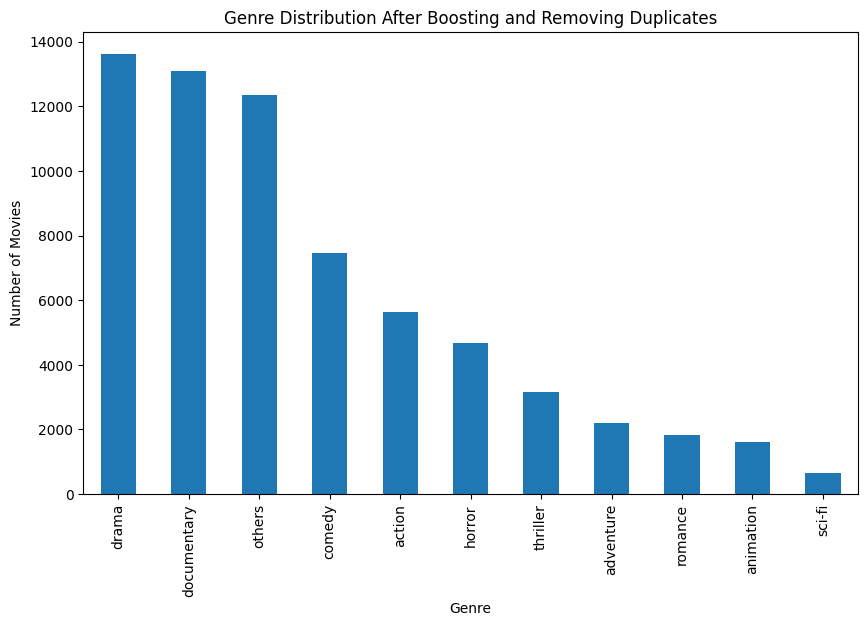

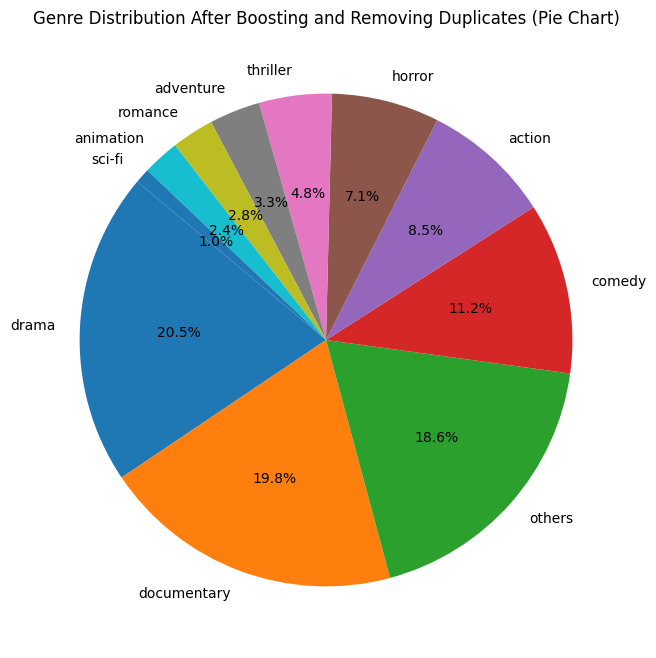

,unnamed: 0,title,genre,description,poster_path
0,1.0,Oscar et la dame rose (2009),drama,Listening in to a conversation between his doc...,NaN
1,2.0,Cupid (1997),thriller,A brother and sister with a past incestuous re...,NaN
2,3.0,"Young, Wild and Wonderful (1980)",others,As the bus empties the students for their fiel...,NaN
3,4.0,The Secret Sin (1915),drama,To help their unemployed father make ends meet...,NaN
4,5.0,The Unrecovered (2007),drama,The film's title refers not only to the un-rec...,NaN


In [ ]:
from typing import final
import pandas as pd
import os
from google.colab import drive
import matplotlib.pyplot as plt

# Mount Google Drive
drive.mount('/content/drive')

# Load cleaned datasets
large_df = pd.read_csv('/content/drive/MyDrive/cleaned_large_dataset.csv')
small_df = pd.read_csv('/content/drive/MyDrive/Dataset/cleaned_small_dataset.csv')
small_df2 = pd.read_csv('/content/drive/MyDrive/smart_scraped_underrepresented_movies.csv')

# Step 1: Find underrepresented genres in large_df (<10%)
total_movies = len(large_df)
genre_counts = large_df['genre'].value_counts(normalize=True)  # normalized percentages
underrepresented_genres = genre_counts[genre_counts < 0.10].index.tolist()

print(f"📉 Underrepresented genres (<10% in large_df): {underrepresented_genres}")

# Step 2: Filter small_df to only those genres
small_df_underrep = small_df[small_df['genre'].isin(underrepresented_genres)]
small_df2_underrep = small_df2[small_df2['genre'].isin(underrepresented_genres)]

print(f"✅ Number of boosting datapoints from small_df: {len(small_df_underrep)}")

# Step 3: Merge large_df and filtered small_df
final_df = pd.concat([large_df, small_df_underrep], ignore_index=True)

# ✅ Step 4: Remove Duplicates based on 'title'
before_dedup = len(final_df)
final_df = final_df.drop_duplicates(subset=['title'])
after_dedup = len(final_df)

print(f"🧹 Removed {before_dedup - after_dedup} duplicate movies. Final dataset size: {after_dedup}")

# ✅ Step 4.5: Combine 'description' and 'overview' into a new 'description' column

# First check which columns exist
available_cols = final_df.columns.tolist()
print(f"Available columns: {available_cols}")

# Safely combine
if 'description' in final_df.columns and 'overview' in final_df.columns:
    final_df['description'] = final_df['description'].fillna('') + ' ' + final_df['overview'].fillna('')
    final_df['description'] = final_df['description'].str.strip()  # Remove extra spaces
    # Optionally drop 'overview' column after combining
    final_df = final_df.drop(columns=['overview'])
elif 'overview' in final_df.columns:
    # If no existing 'description', just copy 'overview' as 'description'
    final_df['description'] = final_df['overview']
    final_df = final_df.drop(columns=['overview'])

print("✅ Successfully combined 'description' and 'overview' into 'description' column!")


# Step 5: Save final boosted and deduplicated dataset
final_df.to_csv('/content/drive/MyDrive/final_boosted_large_dataset.csv', index=False)

print("🚀 Final boosted large dataset saved as 'final_boosted_large_dataset.csv'!")

# Step 6: Plot updated genre distribution
def plot_genre_distribution(df, title):
    genre_counts = df['genre'].value_counts()
    plt.figure(figsize=(10,6))
    genre_counts.plot(kind='bar')
    plt.title(title)
    plt.xlabel('Genre')
    plt.ylabel('Number of Movies')
    plt.show()

    plt.figure(figsize=(8,8))
    genre_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
    plt.title(title + ' (Pie Chart)')
    plt.ylabel('')
    plt.show()

# Step 7: Plot after de-duplication
plot_genre_distribution(final_df, 'Genre Distribution After Boosting and Removing Duplicates')

final_df.isnull().sum()
final_df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
📉 Underrepresented genres (<10% in large_df): ['horror', 'thriller', 'action', 'adventure', 'romance', 'sci-fi', 'animation']
✅ Number of boosting datapoints from small_df: 0
🧹 Removed 0 duplicate movies. Final dataset size: 54214
Available columns: ['unnamed: 0', 'title', 'genre', 'description', 'imdbid', 'imdb link', 'imdb score', 'poster']
✅ Successfully combined 'description' and 'overview' into 'description' column!
🚀 Final boosted large dataset saved as 'final_boosted_large_dataset.csv'!


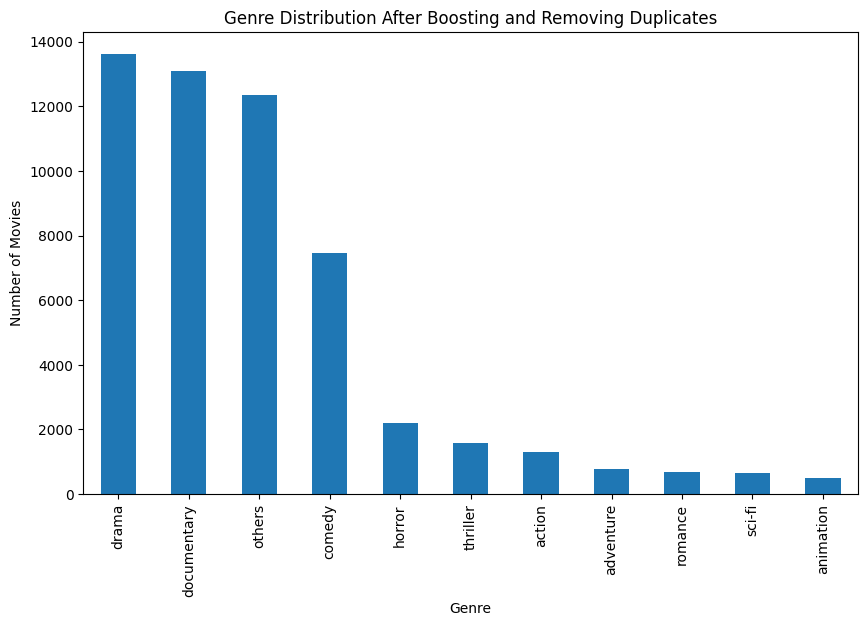

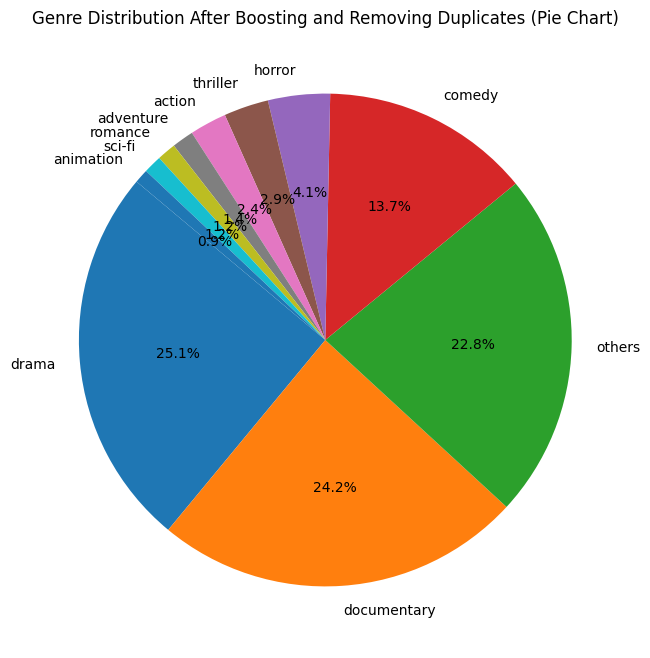

,unnamed: 0,title,genre,description,imdbid,imdb link,imdb score,poster
0,1.0,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,NaN,NaN,NaN,NaN
1,2.0,Cupid (1997),thriller,A brother and sister with a past incestuous r...,NaN,NaN,NaN,NaN
2,3.0,"Young, Wild and Wonderful (1980)",others,As the bus empties the students for their fie...,NaN,NaN,NaN,NaN
3,4.0,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,NaN,NaN,NaN,NaN
4,5.0,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,NaN,NaN,NaN,NaN


In [ ]:
from typing import final
import pandas as pd
import os
from google.colab import drive
import matplotlib.pyplot as plt

# Mount Google Drive
drive.mount('/content/drive')

# Load cleaned datasets
large_df = pd.read_csv('/content/drive/MyDrive/cleaned_large_dataset.csv')
small_df = pd.read_csv('/content/drive/MyDrive/cleaned_small_dataset.csv')
small_df2 = pd.read_csv('/content/drive/MyDrive/smart_scraped_underrepresented_movies.csv')

# Step 1: Find underrepresented genres in large_df (<10%)
total_movies = len(large_df)
genre_counts = large_df['genre'].value_counts(normalize=True)  # normalized percentages
underrepresented_genres = genre_counts[genre_counts < 0.10].index.tolist()

print(f"📉 Underrepresented genres (<10% in large_df): {underrepresented_genres}")

# Step 2: Filter small_df to only those genres
small_df_underrep = small_df[small_df['genre'].isin(underrepresented_genres)]
small_df2_underrep = small_df2[small_df2['genre'].isin(underrepresented_genres)]

print(f"✅ Number of boosting datapoints from small_df: {len(small_df_underrep)}")

# Step 3: Merge large_df and filtered small_df
final_df = pd.concat([large_df, small_df_underrep], ignore_index=True)

# ✅ Step 4: Remove Duplicates based on 'title'
before_dedup = len(final_df)
final_df = final_df.drop_duplicates(subset=['title'])
after_dedup = len(final_df)

print(f"🧹 Removed {before_dedup - after_dedup} duplicate movies. Final dataset size: {after_dedup}")

# ✅ Step 4.5: Combine 'description' and 'overview' into a new 'description' column

# First check which columns exist
available_cols = final_df.columns.tolist()
print(f"Available columns: {available_cols}")

# Safely combine
if 'description' in final_df.columns and 'overview' in final_df.columns:
    final_df['description'] = final_df['description'].fillna('') + ' ' + final_df['overview'].fillna('')
    final_df['description'] = final_df['description'].str.strip()  # Remove extra spaces
    # Optionally drop 'overview' column after combining
    final_df = final_df.drop(columns=['overview'])
elif 'overview' in final_df.columns:
    # If no existing 'description', just copy 'overview' as 'description'
    final_df['description'] = final_df['overview']
    final_df = final_df.drop(columns=['overview'])

print("✅ Successfully combined 'description' and 'overview' into 'description' column!")


# Step 5: Save final boosted and deduplicated dataset
final_df.to_csv('/content/drive/MyDrive/final_boosted_large_dataset.csv', index=False)

print("🚀 Final boosted large dataset saved as 'final_boosted_large_dataset.csv'!")

# Step 6: Plot updated genre distribution
def plot_genre_distribution(df, title):
    genre_counts = df['genre'].value_counts()
    plt.figure(figsize=(10,6))
    genre_counts.plot(kind='bar')
    plt.title(title)
    plt.xlabel('Genre')
    plt.ylabel('Number of Movies')
    plt.show()

    plt.figure(figsize=(8,8))
    genre_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
    plt.title(title + ' (Pie Chart)')
    plt.ylabel('')
    plt.show()

# Step 7: Plot after de-duplication
plot_genre_distribution(final_df, 'Genre Distribution After Boosting and Removing Duplicates')

final_df.isnull().sum()
final_df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
📦 Combined dataset size before merging: (54214, 8)
📦 Scraped dataset size: (69424, 4)
✅ Dropped columns: ['poster_path']
🛠 Dataset size after merging: (123638, 8)
🧹 Removed 22989 duplicate movies. Final size: 100649
🔀 Shuffled the final dataset for randomness!


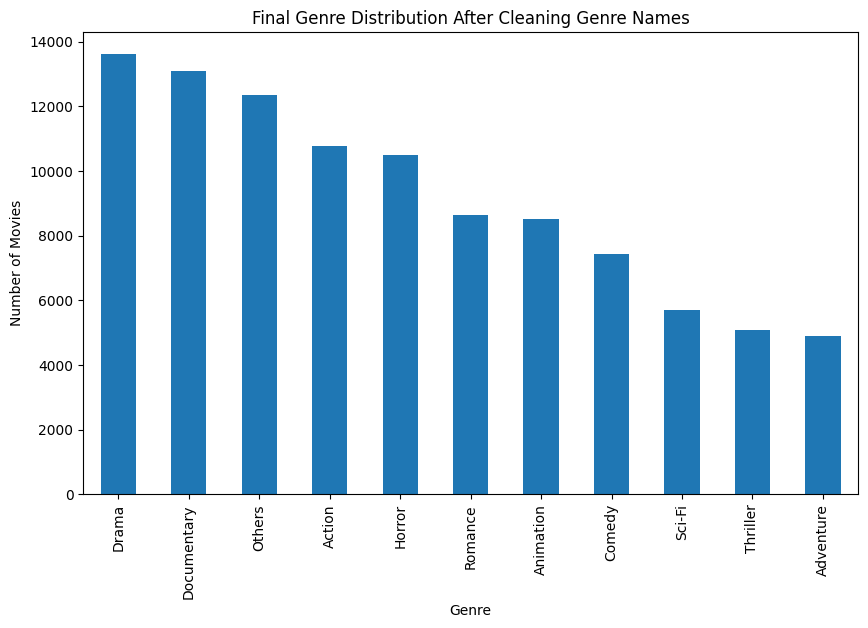

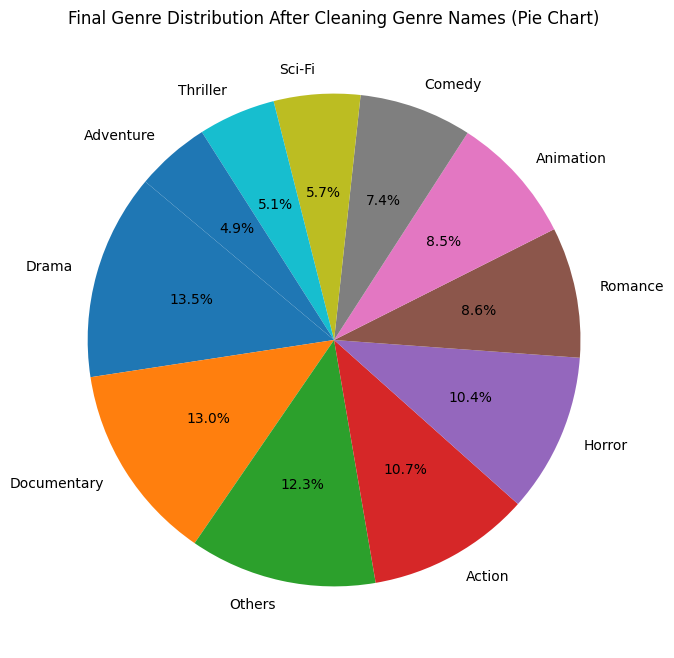

🚀 Saved clean dataset with standardized genres!
🚀 Final cleaned dataset saved as 'final_ready_for_training_dataset.csv'!


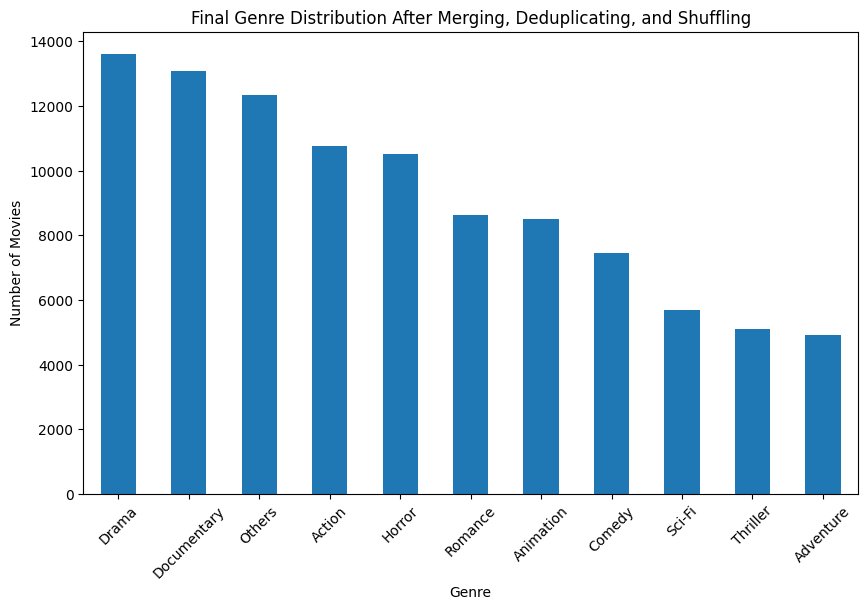

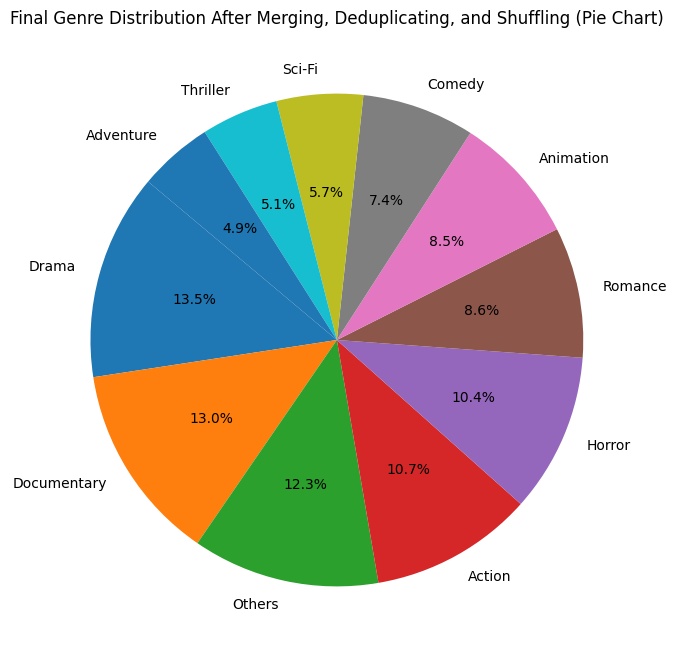

unnamed: 0      46435
title               0
genre               0
description         0
imdbid         100649
imdb link      100649
imdb score     100649
poster         100649
dtype: int64


In [ ]:
import pandas as pd
import os
from google.colab import drive

# Mount Drive
drive.mount('/content/drive')

# Step 1: Load datasets
combined_df = pd.read_csv('/content/drive/MyDrive/final_boosted_large_dataset.csv')
scraped_df = pd.read_csv('/content/drive/MyDrive/smart_scraped_underrepresented_movies.csv')

print(f"📦 Combined dataset size before merging: {combined_df.shape}")
print(f"📦 Scraped dataset size: {scraped_df.shape}")

# Step 2: Drop unwanted columns if exist
columns_to_drop = []

for col in ['poster_path', 'Unnamed: 0']:
    if col in combined_df.columns:
        columns_to_drop.append(col)
    if col in scraped_df.columns:
        columns_to_drop.append(col)

if columns_to_drop:
    combined_df = combined_df.drop(columns=[col for col in columns_to_drop if col in combined_df.columns])
    scraped_df = scraped_df.drop(columns=[col for col in columns_to_drop if col in scraped_df.columns])
    print(f"✅ Dropped columns: {columns_to_drop}")
else:
    print("✅ No extra columns found to drop!")

# Step 3: Merge the two datasets
final_df = pd.concat([combined_df, scraped_df], ignore_index=True)

print(f"🛠 Dataset size after merging: {final_df.shape}")

# Step 4: Remove duplicates (based on title only)
before_dedup = len(final_df)
final_df = final_df.drop_duplicates(subset=['title'])
after_dedup = len(final_df)

print(f"🧹 Removed {before_dedup - after_dedup} duplicate movies. Final size: {after_dedup}")

# Step 5: Shuffle the final dataset
final_df = final_df.sample(frac=1, random_state=42).reset_index(drop=True)
print("🔀 Shuffled the final dataset for randomness!")

# Standardize genres
final_df['genre'] = final_df['genre'].str.title().str.strip()  # <-- Recommended for final

# Plot clean distribution
plot_genre_distribution(final_df, 'Final Genre Distribution After Cleaning Genre Names')

# Save clean final dataset
final_df.to_csv('/content/drive/MyDrive/final_ready_for_training_dataset.csv', index=False)
print("🚀 Saved clean dataset with standardized genres!")

# Step 6: Save the final cleaned merged dataset
final_df.to_csv('/content/drive/MyDrive/final_ready_for_training_dataset.csv', index=False)
print("🚀 Final cleaned dataset saved as 'final_ready_for_training_dataset.csv'!")

# Step 7: Quick check genre distribution
def plot_genre_distribution(df, title):
    import matplotlib.pyplot as plt
    genre_counts = df['genre'].value_counts()
    plt.figure(figsize=(10,6))
    genre_counts.plot(kind='bar')
    plt.title(title)
    plt.xlabel('Genre')
    plt.ylabel('Number of Movies')
    plt.xticks(rotation=45)
    plt.show()

    plt.figure(figsize=(8,8))
    genre_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
    plt.title(title + ' (Pie Chart)')
    plt.ylabel('')
    plt.show()

plot_genre_distribution(final_df, 'Final Genre Distribution After Merging, Deduplicating, and Shuffling')

# Step 8: Check missing values if any
print(final_df.isnull().sum())


In [ ]:
# Group by genre and count the number of movies
genre_counts = final_df['genre'].value_counts()

# Top 3 highest
top_3_highest = genre_counts.head(3)

# Top 3 lowest
top_3_lowest = genre_counts.tail(3)

# Display results
print("📈 Top 3 genres with most movies:")
for genre, count in top_3_highest.items():
    print(f"- {genre}: {count} movies")

print("\n📉 Top 3 genres with least movies:")
for genre, count in top_3_lowest.items():
    print(f"- {genre}: {count} movies")

📈 Top 3 genres with most movies:
- Drama: 13613 movies
- Documentary: 13096 movies
- Others: 12356 movies

📉 Top 3 genres with least movies:
- Sci-Fi: 5706 movies
- Thriller: 5095 movies
- Adventure: 4908 movies


✅ Dropped columns: ['poster']
✅ Capped dataset size: (79156, 3)


<ipython-input-31-34c8c17e4443>:20: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(n=min(len(x), 8000), random_state=42))


                            title   genre  \
0              A Child Is Missing  Action   
1   Maximum Cage Fighting (2006)   Action   
2                          Gunner  Action   
3                    Radical Jack  Action   
4                     Night Teeth  Action   

                                         description  
0  A hermit living in the Washington Mountains st...  
1   Jimmy Garren, a former Tae Kwon Do world cham...  
2  While on a camping trip in order to reconnect,...  
3  After quitting his job, a man decides to go af...  
4  A college student moonlighting as a chauffeur ...  
🚀 Saved final balanced dataset with cap 8000 as 'final_dataset.csv'!


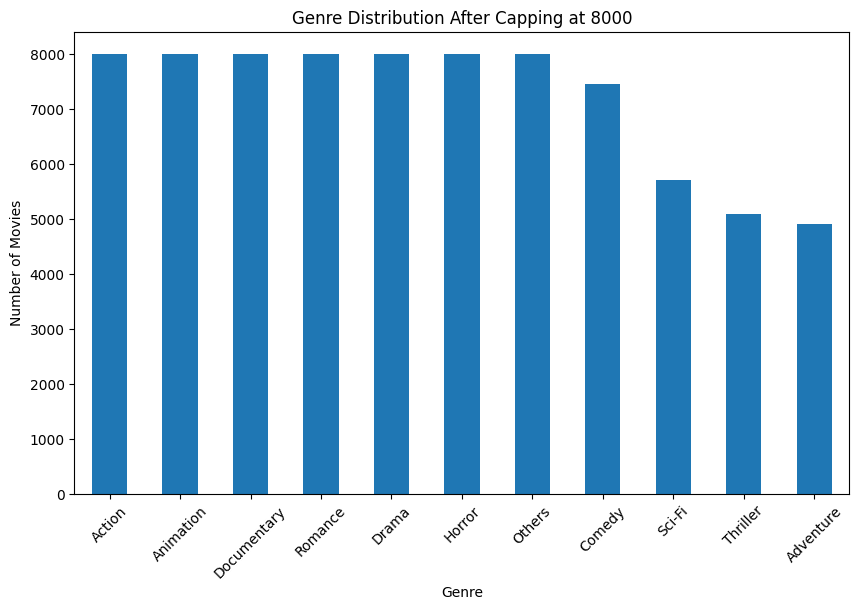

In [ ]:
import pandas as pd

# Step 1: Drop unwanted columns if they exist
columns_to_drop = ['imdbid', 'imdb score', 'imdb link', 'unnamed: 0','poster']
columns_to_drop_existing = [col for col in columns_to_drop if col in final_df.columns]

if columns_to_drop_existing:
    final_df = final_df.drop(columns=columns_to_drop_existing)
    print(f"✅ Dropped columns: {columns_to_drop_existing}")
else:
    print("✅ No unwanted columns found to drop!")

# Step 2: Cap maximum 8000 movies per genre
capped_df = (
    final_df.groupby('genre', group_keys=False)
    .apply(lambda x: x.sample(n=min(len(x), 8000), random_state=42))
    .reset_index(drop=True)
)

print(f"✅ Capped dataset size: {capped_df.shape}")

# Step 3: Save the new balanced dataset
capped_df.to_csv('/content/drive/MyDrive/final_dataset.csv', index=False)

print(capped_df.head())
print("🚀 Saved final balanced dataset with cap 8000 as 'final_dataset.csv'!")

# Step 4: Plot new genre distribution
def plot_genre_distribution(df, title):
    import matplotlib.pyplot as plt
    genre_counts = df['genre'].value_counts()
    plt.figure(figsize=(10,6))
    genre_counts.plot(kind='bar')
    plt.title(title)
    plt.xlabel('Genre')
    plt.ylabel('Number of Movies')
    plt.xticks(rotation=45)
    plt.show()

plot_genre_distribution(capped_df, 'Genre Distribution After Capping at 8000')

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming you have loaded the capped_df already
# If not:
# capped_df = pd.read_csv('/content/drive/MyDrive/final_balanced_capped_dataset.csv')

# Step 1: First split into train (80%) and temp (20%)
train_df, temp_df = train_test_split(
    capped_df,
    test_size=0.2,
    stratify=capped_df['genre'],
    random_state=42
)

# Step 2: Split temp into validation (10%) and test (10%)
val_df, test_df = train_test_split(
    temp_df,
    test_size=0.5,
    stratify=temp_df['genre'],
    random_state=42
)

# Step 3: Save splits
train_df.to_csv('/content/drive/MyDrive/train_split.csv', index=False)
val_df.to_csv('/content/drive/MyDrive/val_split.csv', index=False)
test_df.to_csv('/content/drive/MyDrive/test_split.csv', index=False)

print("🚀 Successfully saved train, validation, and test splits!")
print(f"Train size: {train_df.shape[0]} | Val size: {val_df.shape[0]} | Test size: {test_df.shape[0]}")


🚀 Successfully saved train, validation, and test splits!
Train size: 63324 | Val size: 7916 | Test size: 7916
